In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as ticker
import xarray as xr
import geopandas as gpd

<Axes: >

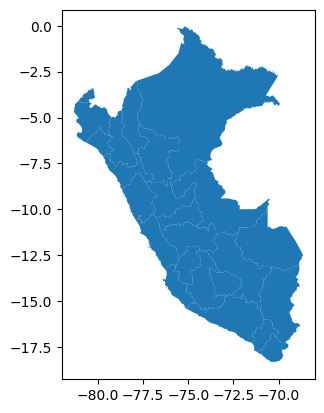

In [28]:

df = pd.read_csv('../data/gfw/fishing_gfw_afh_daily_2012_2024.csv')

ds_bat = xr.open_dataset('../data/gebco/gebco_2024_n-3.2_s-19.4_w-84.6_e-67.8.nc')

shp_peru = gpd.read_file('../data/shapefiles/Regiones_Peru/Regiones_Peru.shp')

shp_peru = shp_peru.to_crs(epsg=4326)


In [3]:
df['time'] = pd.to_datetime(df['time'])
top_flags = df['flag'].value_counts().nlargest(5).index
df_top_flags = df[df['flag'].isin(top_flags)]
df_grouped = df_top_flags.groupby(['flag', 'gearType', 'year']).size().reset_index(name='count')

gear_order = df_top_flags['gearType'].value_counts().index.tolist()
df_grouped['gearType'] = pd.Categorical(df_grouped['gearType'], categories=gear_order, ordered=True)
df_grouped.sort_values('gearType', inplace=True)
df_grouped['gearType_code'] = df_grouped['gearType'].cat.codes

flag_offsets = {flag: offset for flag, offset in zip(top_flags, np.linspace(0, .8, len(top_flags)))}
df_grouped['gearType_jitter'] = df_grouped['gearType_code'] + df_grouped['flag'].map(flag_offsets)

df_nearest_ais = df[df['distance_meters'] < 9260]

top_flags_nearest_ais = df_nearest_ais['flag'].value_counts().nlargest(5).index
df_top_flags_nearest_ais = df_nearest_ais[df_nearest_ais['flag'].isin(top_flags_nearest_ais)]
df_grouped_nearest_ais = df_top_flags_nearest_ais.groupby(['flag', 'gearType', 'year']).size().reset_index(name='count')

gear_order_nearest_ais = df_top_flags_nearest_ais['gearType'].value_counts().index.tolist()
df_grouped_nearest_ais['gearType'] = pd.Categorical(df_grouped_nearest_ais['gearType'], categories=gear_order_nearest_ais, ordered=True)
df_grouped_nearest_ais.sort_values('gearType', inplace=True)
df_grouped_nearest_ais['gearType_code'] = df_grouped_nearest_ais['gearType'].cat.codes

flag_offsets_nearest_ais = {flag: offset for flag, offset in zip(top_flags_nearest_ais, np.linspace(0, .8, len(top_flags_nearest_ais)))}
df_grouped_nearest_ais['gearType_jitter'] = df_grouped_nearest_ais['gearType_code'] + df_grouped_nearest_ais['flag'].map(flag_offsets_nearest_ais)



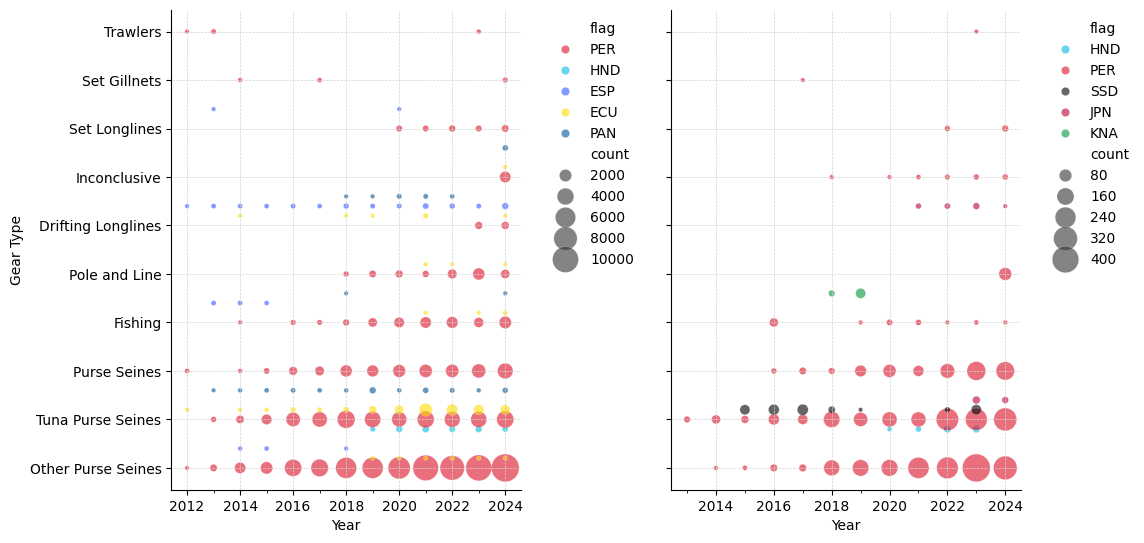

In [4]:
custom_flag_colors = {
    'PER': '#D91023',
    'HND': '#00bce4',
    'ESP': '#3357FF',
    'ECU': '#ffdd00',
    'PAN': '#005293',
    'SSD': '#000000',   #south sudan
    'JPN': '#BC002D',   #japan
    'KNA': '#009739',   #saint kitts and nevis
}
# Diccionario para renombrar los gear types a nombres más legibles
gear_labels = {
    'trawlers': 'Trawlers',
    'tuna_purse_seines': 'Tuna Purse Seines',
    'other_purse_seines': 'Other Purse Seines',
    'purse_seines': 'Purse Seines',
    'drifting_longlines': 'Drifting Longlines',
    'squid_jigger': 'Squid Jigger',
    'fishing': 'Fishing',
    'pole_and_line': 'Pole and Line',
    'set_longlines': 'Set Longlines',
    'inconclusive': 'Inconclusive',
    'set_gillnets': 'Set Gillnets'
}

gear_order_pretty = [gear_labels.get(gear, gear) for gear in gear_order]


fig = plt.figure(figsize=(10, 6))
ax = plt.axes([0.05, 0.1, 0.35, 0.8])

sns.scatterplot(
    data=df_grouped,
    x='year',
    y='gearType_jitter',
    hue='flag',
    size='count',
    sizes=(10, 400),
    alpha=0.6,
    palette=custom_flag_colors,
    ax=ax 
)

ax.set_xlabel('Year')
ax.set_ylabel('Gear Type')
ax.set_yticks(np.arange(len(gear_order)), gear_order)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which='major', linestyle='--', linewidth='0.5', color='lightgray')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Ticks mayores cada 5 años
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Ticks mayores cada 5 años

ax.set_yticks(np.arange(len(gear_order)))
ax.set_yticklabels(gear_order_pretty)
ax2 = plt.axes([0.55, 0.1, 0.35, 0.8])
sns.scatterplot(
    data=df_grouped_nearest_ais,
    x='year',
    y='gearType_jitter',
    hue='flag',
    size='count',
    sizes=(10, 400),
    alpha=0.6,
    palette=custom_flag_colors,
    ax=ax2 
)

ax2.set_xlabel('Year')
ax2.set_ylabel(' ')
ax2.set_yticks(np.arange(len(gear_order_nearest_ais)), gear_order_nearest_ais)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(which='major', linestyle='--', linewidth='0.5', color='lightgray')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Ticks mayores cada 5 años
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Ticks mayores cada 5 años
ax2.set_yticklabels([]);


/var/folders/8j/y_l8frxs2n19mq92k5pv4y100000gn/T/ipykernel_4617/1165726996.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


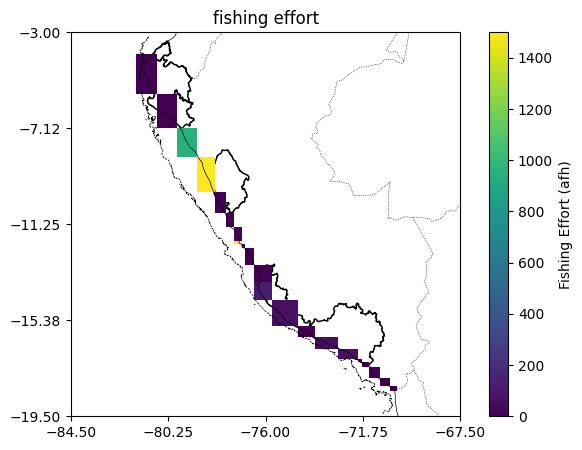

In [29]:
df_peru = df_nearest_ais[df_nearest_ais['flag']=='PER']

df_peru_grouped = df_peru.groupby(['year', 'lat', 'lon']).agg({'afh': 'sum'}).reset_index()
df_lat_lon = df_peru.groupby(['lat', 'lon'], as_index=False)['afh'].sum()
pivot_table = df_lat_lon.pivot_table(index='lat', columns='lon', values='afh', fill_value=np.nan)

lon_min = -84.5 
lon_max = -67.50
lat_min = -19.5
lat_max = -3

lon_ticks = np.linspace(lon_min, lon_max, num=min(5, int((lon_max - lon_min)/0.5)+1))
lat_ticks = np.linspace(lat_min, lat_max, num=min(5, int((lat_max - lat_min)/0.5)+1))

years = df_peru_grouped['year'].unique()
n_years = len(years)


fig = plt.figure()

ax = plt.axes([0.05, 0.1, 0.9, 0.8], projection=ccrs.PlateCarree())
ax.set_title(f'fishing effort')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', lw=0.5)
#ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', linewidth=0.5)
ax.contour(ds_bat['lon'], ds_bat['lat'], ds_bat['elevation'], levels=[-1000], colors='black', linewidths=0.5)

regions_artisanal_fisheries = ['Piura', 'Ica', 'Arequipa', 'Ancash', 'Tumbes', 'Lambayeque']

regions_artisanal_fisheries_capital = ['PIURA', 'ICA', 'AREQUIPA', 'ANCASH', 'TUMBES', 'LAMBAYEQUE']

shp_peru[shp_peru['NAME'].isin(regions_artisanal_fisheries_capital)].plot(ax=ax, edgecolor='black', facecolor='none')

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
    
mesh = ax.pcolormesh(pivot_table.columns, pivot_table.index, pivot_table.values, cmap='viridis', transform=ccrs.PlateCarree(), vmin=0, vmax=1500)
fig.colorbar(mesh, ax=ax, orientation='vertical', label='Fishing Effort (afh)')

plt.tight_layout()
plt.show()


/Users/daniela/Documents/suyana/peru_produccion/.venv/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/var/folders/8j/y_l8frxs2n19mq92k5pv4y100000gn/T/ipykernel_4617/1202077265.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/daniela/Documents/suyana/peru_produccion/.venv/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/daniela/Documents/suyana/peru_produccion/.venv/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


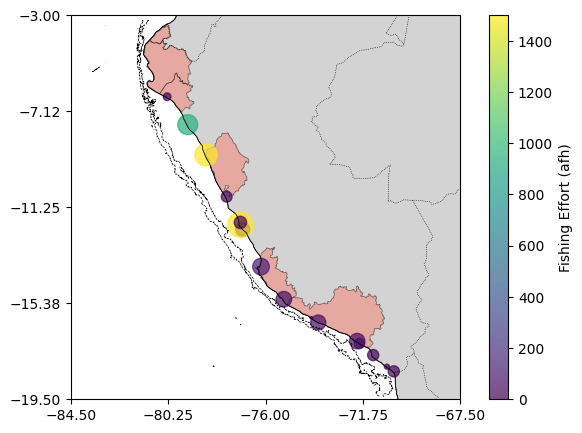

In [35]:

# Filtrar y agrupar los datos de Perú
df_peru = df_nearest_ais[df_nearest_ais['flag'] == 'PER']
df_lat_lon = df_peru.groupby(['lat', 'lon'], as_index=False)['afh'].sum()

# Definir límites y ticks del mapa
lon_min = -84.5 
lon_max = -67.50
lat_min = -19.5
lat_max = -3

lon_ticks = np.linspace(lon_min, lon_max, num=min(5, int((lon_max - lon_min)/0.5)+1))
lat_ticks = np.linspace(lat_min, lat_max, num=min(5, int((lat_max - lat_min)/0.5)+1))

fig = plt.figure()
ax = plt.axes([0.05, 0.1, 0.9, 0.8], projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', lw=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', linewidth=0.5)
ax.contour(ds_bat['lon'], ds_bat['lat'], ds_bat['elevation'], levels=[-2000, -1000], colors='black', linewidths=0.5)

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

shp_peru[shp_peru['NAME'].isin(regions_artisanal_fisheries_capital)].plot(ax=ax, edgecolor='black', facecolor='salmon', alpha=0.5, linewidth=0.5)

scatter = ax.scatter(
    df_lat_lon['lon'],
    df_lat_lon['lat'],
    c=df_lat_lon['afh'],
    s=np.log(df_lat_lon['afh'])*30,
    cmap='viridis',
    transform=ccrs.PlateCarree(),
    vmin=0,
    vmax=1500,
    alpha=0.7
)

fig.colorbar(scatter, ax=ax, orientation='vertical', label='Fishing Effort (afh)')
plt.tight_layout()
plt.show()
